In [68]:
import pandas as pd
import numpy as np
df = pd.read_csv("ds_salaries.csv")

In [69]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [70]:
df.head(4)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S


In [71]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


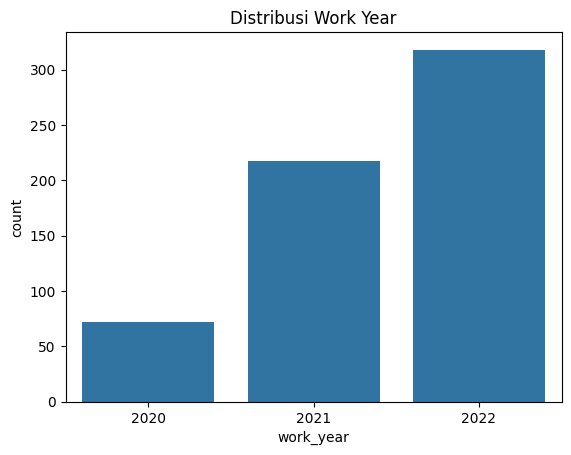

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='work_year')
plt.title('Distribusi Work Year')
plt.show()

In [74]:
df.duplicated().sum()

0

In [75]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [76]:


# Preprocessing dan deteksi outlier
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df['outlier_flag'] = ((df['salary_in_usd'] < batas_bawah) | (df['salary_in_usd'] > batas_atas))
df_bersih = df[~df['outlier_flag']]

# Persiapkan data
A = df_bersih[['work_year']]
o = df_bersih['salary_in_usd']

# Split data
A_train, A_test, o_train, o_test = train_test_split(A, o, test_size=0.2, random_state=42)

# Buat dan train model
linregg = LinearRegression()
linregg.fit(A_train, o_train)

LinearRegression()

In [77]:
A = df_bersih[['work_year']]
o = df_bersih['salary_in_usd']

In [78]:
A_train, A_test, o_train, o_test = train_test_split(A, o, test_size=0.2, random_state=42)

In [79]:
print(A_train.shape)
print(A_test.shape)
print(o_train.shape)
print(o_test.shape)

(477, 1)
(120, 1)
(477,)
(120,)


In [80]:
linregg = LinearRegression()
linregg.fit(A_train, o_train)

LinearRegression()

In [81]:
o_pred = linregg.predict(A_test)

In [82]:
interc = linregg.intercept_
coeff = linregg.coef_

print("Intercept:", interc)
print("Coefficient:", coeff)

Intercept: -46644690.93886711
Coefficient: [23129.04426576]


In [83]:
A_train_cons = sm.add_constant(A_train)
ols_mod = sm.OLS(o_train, A_train_cons)
results = ols_mod.fit()

In [84]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     37.06
Date:                Sun, 25 May 2025   Prob (F-statistic):           2.37e-09
Time:                        15:50:29   Log-Likelihood:                -5906.9
No. Observations:                 477   AIC:                         1.182e+04
Df Residuals:                     475   BIC:                         1.183e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.664e+07   7.68e+06     -6.073      0.0

In [85]:
X = df[['work_year']]
y = df['salary_in_usd']

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(485, 1)
(122, 1)
(485,)
(122,)


In [88]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = linreg.predict(X_test)

In [90]:
import matplotlib.pyplot as plt

In [91]:
inter = linreg.intercept_
coef = linreg.coef_

print("Intercept:", inter)
print("Coefficient:", coef)

Intercept: -38455980.975738026
Coefficient: [19080.74672781]


In [92]:
from sklearn.metrics import mean_squared_error, r2_score
msq = mean_squared_error(o_test, o_pred)
print("Mean squared error: ", msq)

Mean squared error:  2553588039.4824743


In [93]:
R2 = r2_score(o_test, o_pred)
print("R-squared: ", R2)

R-squared:  0.041311514026728946


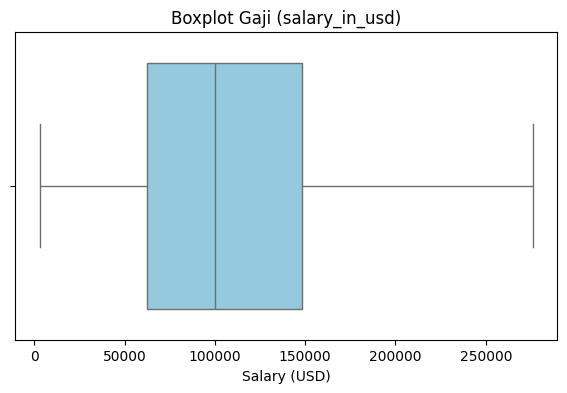

In [94]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_bersih['salary_in_usd'], color='skyblue')
plt.title("Boxplot Gaji (salary_in_usd)")
plt.xlabel("Salary (USD)")
plt.show()

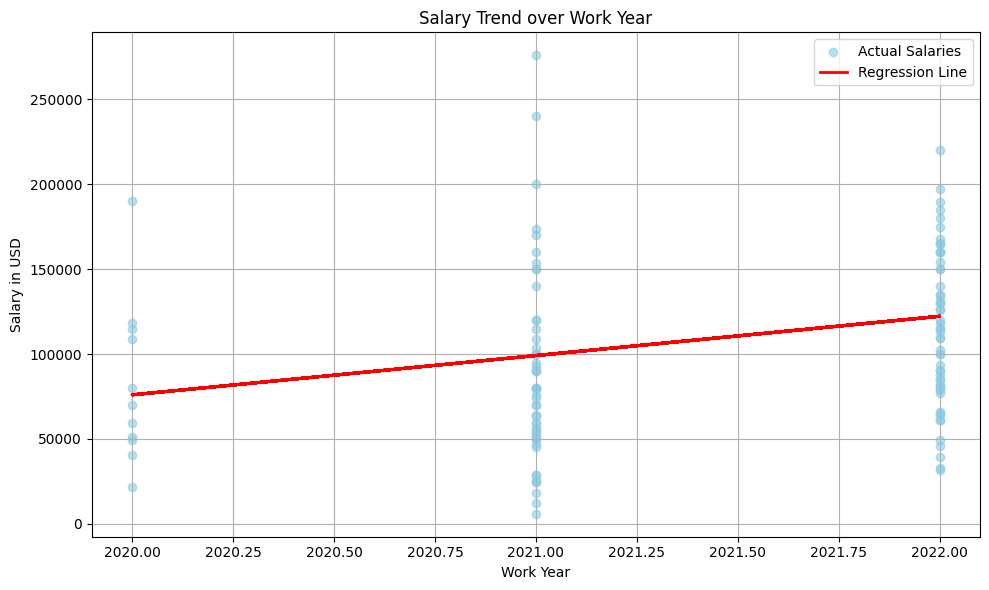

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(A_test, o_test, color='skyblue', label='Actual Salaries', alpha=0.6)

plt.plot(A_test, o_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Salary Trend over Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [97]:
X_train_cons = sm.add_constant(X_train)
ols_mod = sm.OLS(y_train, X_train_cons)
result = ols_mod.fit()

In [98]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     16.81
Date:                Sun, 25 May 2025   Prob (F-statistic):           4.85e-05
Time:                        15:50:29   Log-Likelihood:                -6110.2
No. Observations:                 485   AIC:                         1.222e+04
Df Residuals:                     483   BIC:                         1.223e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.846e+07   9.41e+06     -4.088      0.0

In [99]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  3903212935.538653


In [100]:
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

R-squared:  -0.018432481112535815


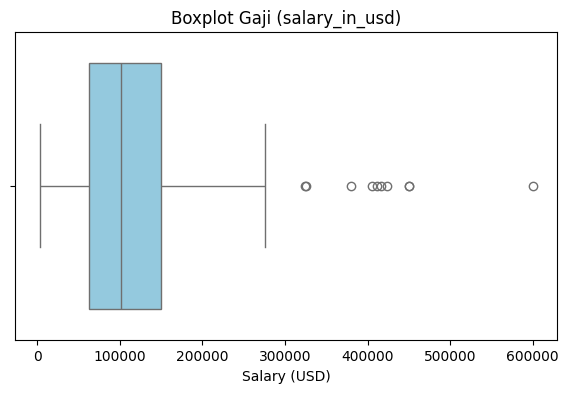

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.boxplot(x=df['salary_in_usd'], color='skyblue')
plt.title("Boxplot Gaji (salary_in_usd)")
plt.xlabel("Salary (USD)")
plt.show()

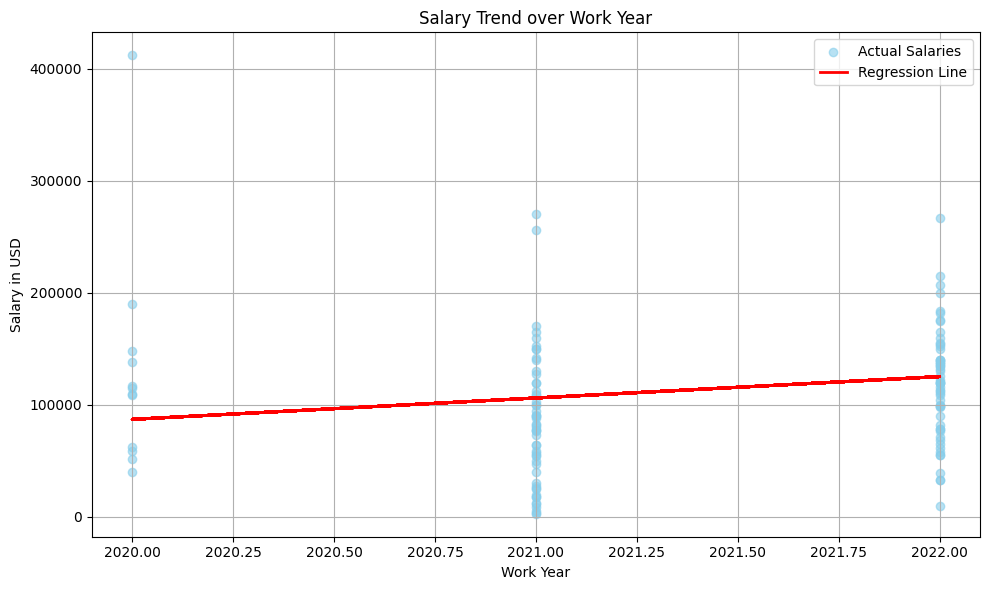

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual Salaries', alpha=0.6)

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Salary Trend over Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
X = df[['work_year', 'salary_in_usd']]

In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [106]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [107]:
# Tambahkan hasil klaster ke DataFrame
df['cluster'] = kmeans.labels_

# Lihat hasil awal
print(df[['work_year', 'salary_in_usd', 'cluster']].head())


   work_year  salary_in_usd  cluster
0       2020          79833        2
1       2020         260000        2
2       2020         109024        2
3       2020          20000        2
4       2020         150000        2


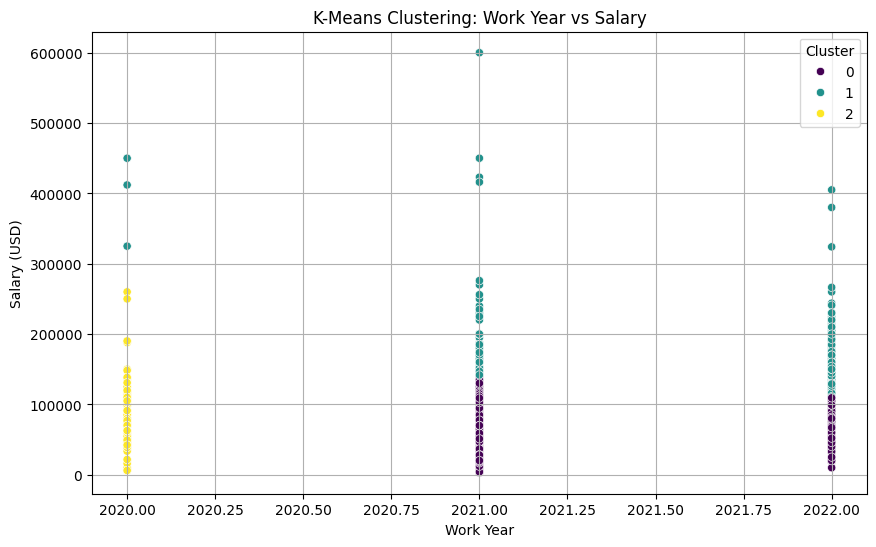

In [108]:
# Visualisasi dengan warna sesuai klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='work_year', y='salary_in_usd', hue='cluster', palette='viridis')
plt.title("K-Means Clustering: Work Year vs Salary")
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


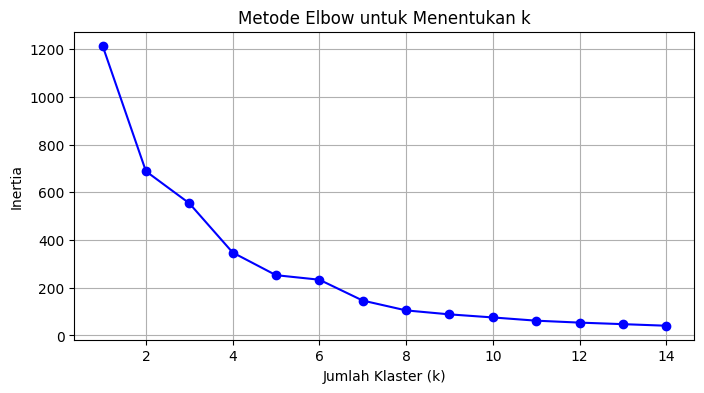

In [109]:
# Coba nilai k dari 1 sampai 15
inertia = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k')
plt.grid(True)
plt.show()


In [110]:
cluster_counts = df['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Klaster {cluster_id}: {count} data")


Klaster 0: 301 data
Klaster 1: 237 data
Klaster 2: 69 data


In [111]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3889980110090059


In [112]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"k = {k}, Silhouette Score = {score}")


k = 2, Silhouette Score = 0.48019414780476394
k = 3, Silhouette Score = 0.3889980110090059
k = 4, Silhouette Score = 0.5189095044467242
k = 5, Silhouette Score = 0.5372899142777678


In [113]:
df['cluster'] = df['cluster'] + 3
cluster_counts = df['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Klaster {cluster_id}: {count} data")

Klaster 3: 301 data
Klaster 4: 237 data
Klaster 5: 69 data


In [114]:
skor = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {skor}")

Silhouette Score: 0.5372899142777678


<Axes: xlabel='PC1', ylabel='PC2'>

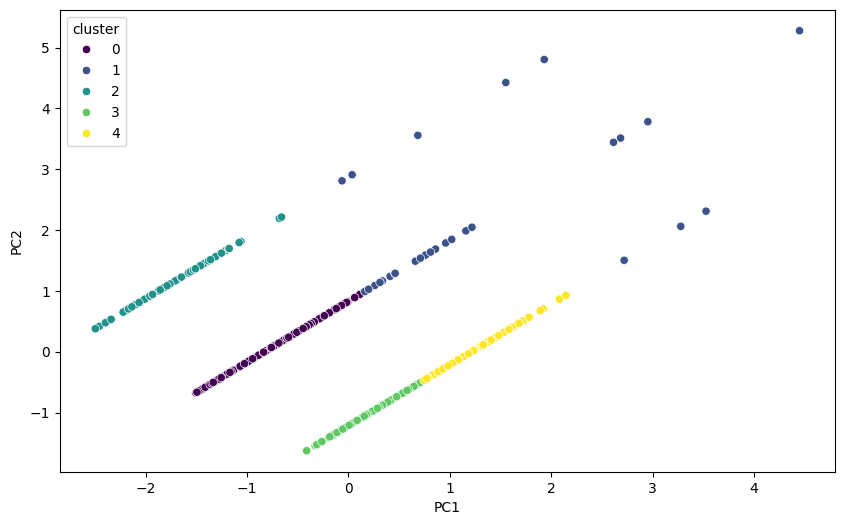

In [115]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')

Kesimpulan dari hasil clustering dataset ini adalah bahwasannya skor untuk kluster 0,1,2 masih terbilang aman dan ketimpangan nilai dari masing-masing cluster masih terbilang baik, tapi ada bagusnya untuk skor yang lebih maksimal bisa menggunakan cluster lainnya seperti 2,3,4 atau 3,4,5.